# **Análise de Segmentação de Clientes com K-Means**

### **Introdução**

Entender o comportamento do cliente é a chave para o sucesso de qualquer negócio. Em vez de tratar todos os clientes da mesma forma, a segmentação nos permite agrupar clientes com características semelhantes e criar estratégias de marketing personalizadas e mais eficientes.

Neste projeto, foi usado **Machine Learning não supervisionado**, especificamente o algoritmo **K-Means**, para identificar diferentes segmentos de clientes em um dataset de um shopping.

**Objetivo do Projeto:**
Transformar dados brutos de clientes em perfis (ou "personas") acionáveis, que podem ser usados para direcionar campanhas de marketing, ofertas de produtos e programas de fidelidade.


### **Sobre o Dataset**

O dataset utilizado (`Mall_Customers.csv`) contém informações básicas sobre os clientes de um shopping.

**Features (Colunas):**
*   `CustomerID`: ID único para cada cliente.
*   `Gender`: Gênero do cliente.
*   `Age`: Idade do cliente.
*   `Annual Income (k$)`: Renda anual do cliente em milhares de dólares.
*   `Spending Score (1-100)`: Uma pontuação de 1 a 100 atribuída pelo shopping com base no comportamento de gastos do cliente.

In [11]:
!pip install pandas matplotlib seaborn scikit-learn

## **1. Configuração do Ambiente e Carregamento dos Dados**

Primeiro, importamos as bibliotecas necessárias. Além do `pandas`, `matplotlib` e `seaborn`, vamos importar o `KMeans` da biblioteca `scikit-learn`, que é a principal ferramenta de Machine Learning em Python.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

In [13]:

df = pd.read_csv('Mall_Customers.csv')
print("Amostra dos Dados:")
display(df.head())

# Verificar informações gerais, como tipos de dados e valores nulos
print("\nInformações do DataFrame:")
df.info()

# Renomear colunas para facilitar o uso
df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

print("\nColunas após renomear:")
display(df.head())

Amostra dos Dados:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Colunas após renomear:


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **2. Análise Exploratória e Visualização**

Antes de aplicar qualquer algoritmo, vamos explorar os dados. Nosso foco será nas colunas `Annual Income (k$)` e `Spending Score (1-100)`, pois nossa hipótese é que a combinação dessas duas variáveis é um forte indicador do perfil de consumo do cliente.

Criaremos um gráfico de dispersão (`scatterplot`) para visualizar se existem agrupamentos naturais nos dados.

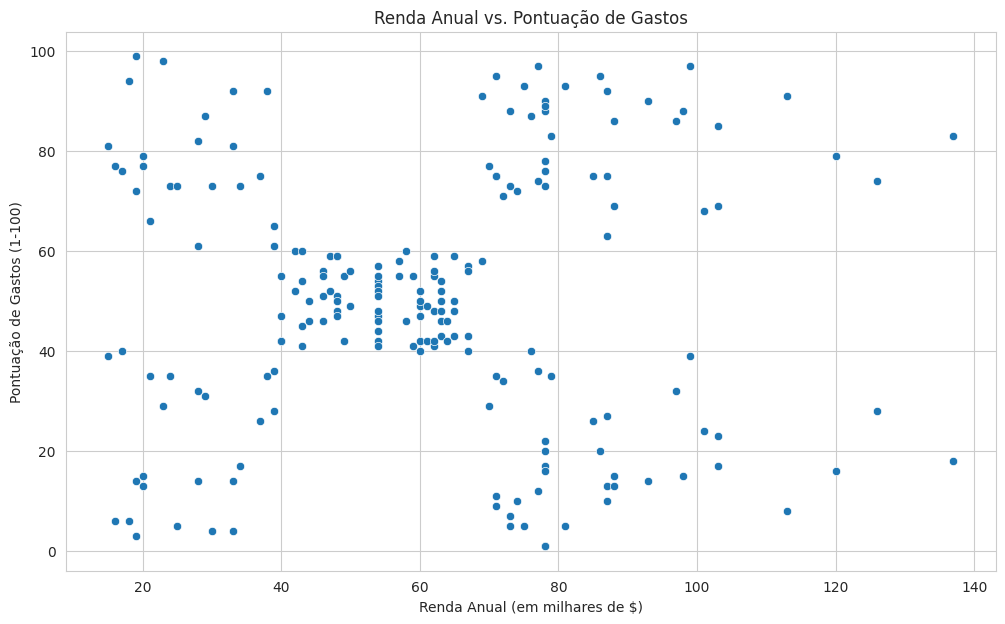

In [14]:
plt.title('Renda Anual vs. Pontuação de Gastos')
sns.scatterplot(x='Annual Income', y='Spending Score', data=df)
plt.xlabel('Renda Anual (em milhares de $)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.show()

**Observação:** O gráfico de dispersão já sugere visualmente a existência de cerca de 5 grupos distintos de clientes. Isso nos dá uma forte indicação de que um algoritmo de clusterização será eficaz.

## **3. Modelagem com K-Means**

O K-Means é um algoritmo que agrupa os dados em um número pré-definido de clusters (K). O desafio é encontrar o número ideal de clusters.

### **3.1. Encontrando o número ideal de clusters (K) com o Método do Cotovelo (Elbow Method)**

O Método do Cotovelo nos ajuda a escolher o valor ótimo para K. Ele funciona rodando o K-Means para um intervalo de valores de K (ex: de 1 a 10) e calculando a "inércia" para cada um. A inércia mede a soma das distâncias quadradas dos pontos de dados ao centro do seu cluster.

Procuramos o ponto no gráfico onde a queda da inércia se torna menos acentuada, formando um "cotovelo". Este ponto geralmente indica o número ideal de clusters.

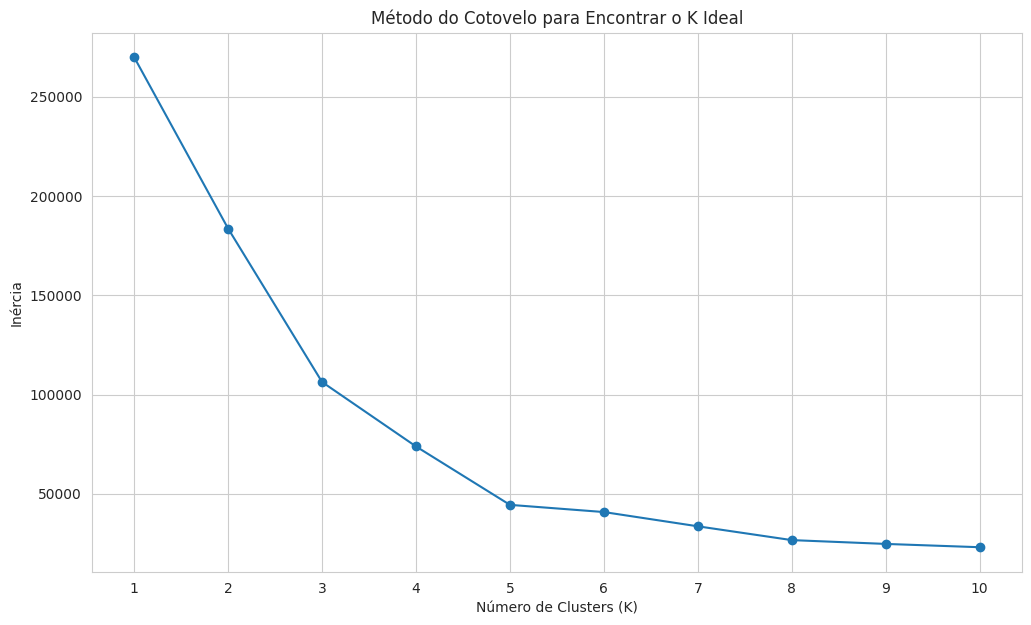

In [16]:
# Selecionando as features para o modelo
X = df[['Annual Income', 'Spending Score']]

# Calculando a inércia para diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.title('Método do Cotovelo para Encontrar o K Ideal')
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.show()

**Conclusão do Método do Cotovelo:** O gráfico mostra um "cotovelo" claro em **K=5**. Após este ponto, a redução da inércia diminui drasticamente. Portanto, usaremos 5 clusters para segmentar nossos clientes.

### **3.2. Aplicando o K-Means com K=5**

Agora que definimos o número ideal de clusters, vamos aplicar o algoritmo K-Means aos nossos dados e atribuir um rótulo de cluster (de 0 a 4) para cada cliente.

In [17]:
# Criando e treinando o modelo final com K=5
kmeans_final = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X)

# Exibindo as primeiras linhas com os clusters atribuídos
display(df.head())

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## **4. Visualização e Interpretação dos Segmentos**

Com os clientes devidamente clusterizados, podemos visualizar os segmentos para entender o perfil de cada grupo. Vamos recriar o gráfico de dispersão, mas agora colorindo cada ponto de acordo com o seu cluster.

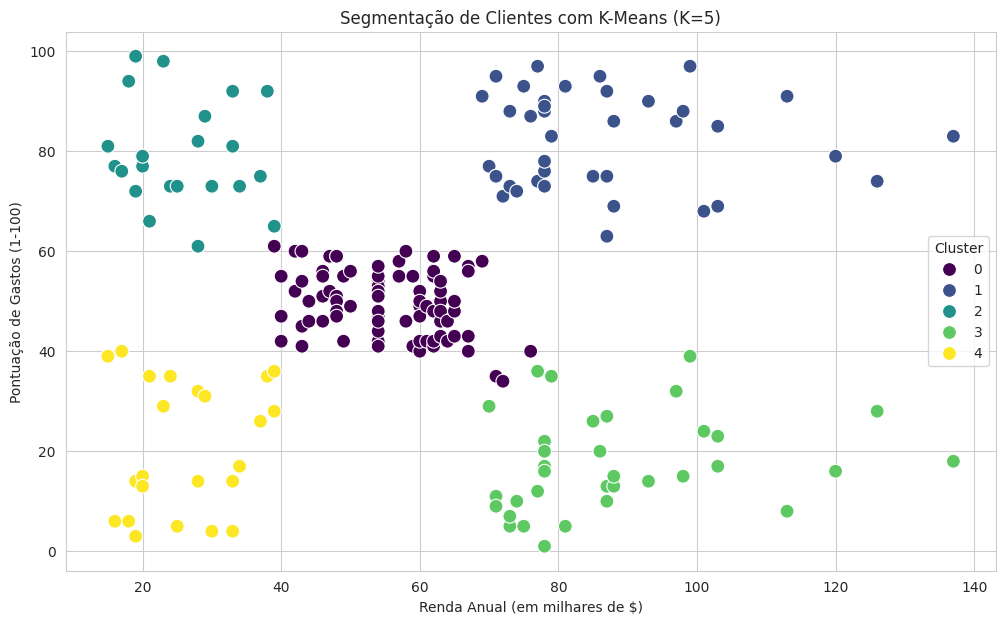

In [19]:
plt.title('Segmentação de Clientes com K-Means (K=5)')
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=df, palette='viridis', s=100)
plt.xlabel('Renda Anual (em milhares de $)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend(title='Cluster')
plt.show()

## **5. Conclusões e Perfis dos Clientes**

A visualização dos clusters nos permite definir perfis claros para cada segmento. A partir disso, podemos derivar estratégias de negócio acionáveis.

**Análise dos Segmentos:**

*   **Cluster 0 (Roxo): Os Econômicos**
    *   **Perfil:** Baixa renda anual e baixa pontuação de gastos.
    *   **Estratégia:** Clientes sensíveis a preço. Focar em promoções, descontos e programas de fidelidade baseados em volume.

*   **Cluster 1 (Verde): O Alvo Principal**
    *   **Perfil:** Renda anual alta e alta pontuação de gastos.
    *   **Estratégia:** O grupo mais valioso. Ideal para marketing de produtos premium, programas de exclusividade e acesso antecipado a novos produtos.

*   **Cluster 2 (Amarelo): Os Consumidores Padrão**
    *   **Perfil:** Renda e gastos moderados. Representam o cliente médio.
    *   **Estratégia:** Manter o engajamento com marketing de massa, novidades e ofertas sazonais.

*   **Cluster 3 (Verde-azulado): Os Cautelosos**
    *   **Perfil:** Renda anual alta, mas baixa pontuação de gastos.
    *   **Estratégia:** Clientes que têm potencial, mas não gastam. Investigar suas necessidades e oferecer produtos de maior valor agregado ou experiências que justifiquem o gasto.

*   **Cluster 4 (Azul): Os Despreocupados**
    *   **Perfil:** Baixa renda anual, mas alta pontuação de gastos.
    *   **Estratégia:** Clientes jovens ou que gastam muito com base em tendências. Marketing agressivo em redes sociais e ofertas de "compre agora, pague depois".

Este projeto demonstra como o Machine Learning pode transformar dados brutos em inteligência de negócio, permitindo que uma empresa se comunique de forma muito mais eficaz com seus clientes.